## World Development Indicators - Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

datos = pd.read_csv("suramerica.csv").drop('Unnamed: 0', 1)
datos.head()

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Antigua and Barbuda,ATG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,126.144000
1,Antigua and Barbuda,ATG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.237117
2,Antigua and Barbuda,ATG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,7.779958
3,Antigua and Barbuda,ATG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,80.457159
4,Antigua and Barbuda,ATG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,32.920000


In [55]:
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))
paises = ['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)']
indicators = ['GDP (constant LCU)','GDP (current LCU)','GDP (current US$)','GDP at market prices (constant 2010 US$)','GDP deflator (base year varies by country)','GDP growth (annual %)','GDP per capita (constant 2010 US$)','GDP per capita (constant LCU)','GDP per capita (current LCU)','GDP per capita (current US$)','GDP per capita growth (annual %)','GDP per capita, PPP (constant 2011 international $)','GDP per capita, PPP (current international $)','GDP, PPP (constant 2011 international $)','GDP, PPP (current international $)']
years = range(2008,2012+1)

tabla = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorName']).loc[(paises,years),indicators]

print("--- %s seconds ---" % (time.time() - start_time))

tabla

--- 1.53200006485 seconds ---


IndicatorName                  GDP (constant LCU)  GDP (current LCU)  \
CountryName              Year                                          
Antigua and Barbuda      2008        3.358406e+09       3.637845e+09   
                         2009        2.954188e+09       3.257308e+09   
                         2010        2.743171e+09       3.065955e+09   
                         2011        2.693974e+09       3.050780e+09   
                         2012        2.802259e+09       3.252725e+09   
Argentina                2008        7.058647e+11       1.283906e+12   
                         2009        7.062178e+11       1.411526e+12   
                         2010        7.729666e+11       1.810830e+12   
                         2011        8.377910e+11       2.312009e+12   
                         2012        8.445081e+11       2.765575e+12   
Aruba                    2008        3.293180e+09       4.997610e+09   
                         2009        3.107000e+09       4.473090e+09   
                         2010                 NaN       4.417190e+09   
                         2011                 NaN       4.626190e+09   
                         2012                 NaN                NaN   
Bahamas, The             2008        7.893019e+09       8.246650e+09   
                         2009        7.563465e+09       7.820420e+09   
                         2010        7.679850e+09       7.909580e+09   
                         2011        7.726920e+09       7.889750e+09   
                         2012        7.898250e+09       8.234470e+09   
Barbados                 2008        1.141000e+09       9.190000e+09   
                         2009        1.095000e+09       9.204000e+09   
                         2010        1.098000e+09       8.891000e+09   
                         2011        1.106000e+09       8.716000e+09   
                         2012        1.109000e+09       8.626000e+09   
Belize                   2008        2.353310e+09       2.737250e+09   
                         2009        2.370095e+09       2.673914e+09   
                         2010        2.448874e+09       2.794227e+09   
                         2011        2.500397e+09       2.974011e+09   
                         2012        2.596031e+09       3.147735e+09   
...                                           ...                ...   
Suriname                 2008        8.395000e+09       9.698000e+09   
                         2009        8.648000e+09       1.063800e+10   
                         2010        9.094000e+09       1.199300e+10   
                         2011        9.573000e+09       1.445200e+10   
                         2012        9.867000e+09       1.643400e+10   
Trinidad and Tobago      2008        9.292100e+10       1.752870e+11   
                         2009        8.884200e+10       1.212810e+11   
                         2010        8.875900e+10       1.341250e+11   
                         2011        8.876500e+10       1.564500e+11   
                         2012        8.997800e+10       1.580450e+11   
Turks and Caicos Islands 2008                 NaN                NaN   
                         2009                 NaN                NaN   
                         2010                 NaN                NaN   
                         2011                 NaN                NaN   
                         2012                 NaN                NaN   
Uruguay                  2008        5.052072e+11       6.361509e+11   
                         2009        5.266457e+11       7.145234e+11   
                         2010        5.677420e+11       8.080785e+11   
                         2011        5.970496e+11       9.263561e+11   
                         2012        6.168902e+11       1.043637e+12   
Venezuela, RB            2008        5.852507e+10       6.775936e+11   
                         2009        5.665092e+10       7.072625e+11   
                         2010        5.5

In [2]:
def splitter(tab,y_indicator):
    # Asignamos X e y, eliminando la columna y en X
    X = np.delete(tab[:,:], y_indicator, 1)
    y = tab[:,y_indicator]
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [3]:
def r2(y_true, y_predict):
    return r2_score(y_true, y_predict)

In [4]:
def DTR(X_train, X_test, y_train, y_test):
    estimator = DecisionTreeRegressor()
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    R2_test = r2(y_test,y_predict)
    return R2_test, y_test , y_predict

In [5]:
def imputador(tab):
    impute=Imputer(missing_values="NaN",strategy='mean',axis=0)
    impute.fit(tab)
    tab_imputada=impute.transform(tab)
    return pd.DataFrame(tab_imputada)

In [6]:
def Grid_Search_CV(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2, random_state=0)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}

    grid = GridSearchCV(estimator, params, cv=cv, scoring="r2")

    grid.fit(X_train, y_train)
    
    for k,v in grid.best_params_.iteritems():
        best_max_depth = v
    
    return best_max_depth

In [7]:
def Grid_Search_CV_v11(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2, random_state=0)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}
    scoring_func = make_scorer(r2)
    
    grid = GridSearchCV(estimator, params, cv=cv, scoring=scoring_func)

    grid.fit(X_train, y_train)
    
    for k,v in grid.best_params_.iteritems():
        best_max_depth = v
    
    return best_max_depth

In [8]:
def trial(tab,y_indicator):
    X_train, X_test, y_train, y_test = splitter(tab,y_indicator)
    best_max_depth = Grid_Search_CV_v11(X_train, y_train)
    y_predict_optimunGrid = best_estimator.predict(X_test)
    print r2(y_test,y_predict_optimunGrid)
    return pd.DataFrame(zip(*[y_test,y_predict_optimunGrid]))

In [10]:
tabla_zeros = pd.DataFrame(tabla).fillna(value=0)

economia_zeros = tabla_zeros.loc[:, (tabla_zeros != 0).any(axis=0)]

economia_imputada = imputador(tabla)

In [11]:
pd.DataFrame(tabla_zeros)

IndicatorName                  GDP (constant LCU)  GDP (current LCU)  \
CountryName              Year                                          
Antigua and Barbuda      2008        3.358406e+09       3.637845e+09   
                         2009        2.954188e+09       3.257308e+09   
                         2010        2.743171e+09       3.065955e+09   
                         2011        2.693974e+09       3.050780e+09   
                         2012        2.802259e+09       3.252725e+09   
Argentina                2008        7.058647e+11       1.283906e+12   
                         2009        7.062178e+11       1.411526e+12   
                         2010        7.729666e+11       1.810830e+12   
                         2011        8.377910e+11       2.312009e+12   
                         2012        8.445081e+11       2.765575e+12   
Aruba                    2008        3.293180e+09       4.997610e+09   
                         2009        3.107000e+09       4.473090e+09   
                         2010        0.000000e+00       4.417190e+09   
                         2011        0.000000e+00       4.626190e+09   
                         2012        0.000000e+00       0.000000e+00   
Bahamas, The             2008        7.893019e+09       8.246650e+09   
                         2009        7.563465e+09       7.820420e+09   
                         2010        7.679850e+09       7.909580e+09   
                         2011        7.726920e+09       7.889750e+09   
                         2012        7.898250e+09       8.234470e+09   
Barbados                 2008        1.141000e+09       9.190000e+09   
                         2009        1.095000e+09       9.204000e+09   
                         2010        1.098000e+09       8.891000e+09   
                         2011        1.106000e+09       8.716000e+09   
                         2012        1.109000e+09       8.626000e+09   
Belize                   2008        2.353310e+09       2.737250e+09   
                         2009        2.370095e+09       2.673914e+09   
                         2010        2.448874e+09       2.794227e+09   
                         2011        2.500397e+09       2.974011e+09   
                         2012        2.596031e+09       3.147735e+09   
...                                           ...                ...   
Suriname                 2008        8.395000e+09       9.698000e+09   
                         2009        8.648000e+09       1.063800e+10   
                         2010        9.094000e+09       1.199300e+10   
                         2011        9.573000e+09       1.445200e+10   
                         2012        9.867000e+09       1.643400e+10   
Trinidad and Tobago      2008        9.292100e+10       1.752870e+11   
                         2009        8.884200e+10       1.212810e+11   
                         2010        8.875900e+10       1.341250e+11   
                         2011        8.876500e+10       1.564500e+11   
                         2012        8.997800e+10       1.580450e+11   
Turks and Caicos Islands 2008        0.000000e+00       0.000000e+00   
                         2009        0.000000e+00       0.000000e+00   
                         2010        0.000000e+00       0.000000e+00   
                         2011        0.000000e+00       0.000000e+00   
                         2012        0.000000e+00       0.000000e+00   
Uruguay                  2008        5.052072e+11       6.361509e+11   
                         2009        5.266457e+11       7.145234e+11   
                         2010        5.677420e+11       8.080785e+11   
                         2011        5.970496e+11       9.263561e+11   
                         2012        6.168902e+11       1.043637e+12   
Venezuela, RB            2008        5.852507e+10       6.775936e+11   
                         2009        5.665092e+10       7.072625e+11   
                         2010        5.5

## Eliminamos los indicadores que no tienen registros (Columnas en Zero)

In [12]:
economia_zeros = tabla_zeros.loc[:, (tabla_zeros != 0).any(axis=0)]

economia_zeros

IndicatorName                  GDP (constant LCU)  GDP (current LCU)  \
CountryName              Year                                          
Antigua and Barbuda      2008        3.358406e+09       3.637845e+09   
                         2009        2.954188e+09       3.257308e+09   
                         2010        2.743171e+09       3.065955e+09   
                         2011        2.693974e+09       3.050780e+09   
                         2012        2.802259e+09       3.252725e+09   
Argentina                2008        7.058647e+11       1.283906e+12   
                         2009        7.062178e+11       1.411526e+12   
                         2010        7.729666e+11       1.810830e+12   
                         2011        8.377910e+11       2.312009e+12   
                         2012        8.445081e+11       2.765575e+12   
Aruba                    2008        3.293180e+09       4.997610e+09   
                         2009        3.107000e+09       4.473090e+09   
                         2010        0.000000e+00       4.417190e+09   
                         2011        0.000000e+00       4.626190e+09   
                         2012        0.000000e+00       0.000000e+00   
Bahamas, The             2008        7.893019e+09       8.246650e+09   
                         2009        7.563465e+09       7.820420e+09   
                         2010        7.679850e+09       7.909580e+09   
                         2011        7.726920e+09       7.889750e+09   
                         2012        7.898250e+09       8.234470e+09   
Barbados                 2008        1.141000e+09       9.190000e+09   
                         2009        1.095000e+09       9.204000e+09   
                         2010        1.098000e+09       8.891000e+09   
                         2011        1.106000e+09       8.716000e+09   
                         2012        1.109000e+09       8.626000e+09   
Belize                   2008        2.353310e+09       2.737250e+09   
                         2009        2.370095e+09       2.673914e+09   
                         2010        2.448874e+09       2.794227e+09   
                         2011        2.500397e+09       2.974011e+09   
                         2012        2.596031e+09       3.147735e+09   
...                                           ...                ...   
Suriname                 2008        8.395000e+09       9.698000e+09   
                         2009        8.648000e+09       1.063800e+10   
                         2010        9.094000e+09       1.199300e+10   
                         2011        9.573000e+09       1.445200e+10   
                         2012        9.867000e+09       1.643400e+10   
Trinidad and Tobago      2008        9.292100e+10       1.752870e+11   
                         2009        8.884200e+10       1.212810e+11   
                         2010        8.875900e+10       1.341250e+11   
                         2011        8.876500e+10       1.564500e+11   
                         2012        8.997800e+10       1.580450e+11   
Turks and Caicos Islands 2008        0.000000e+00       0.000000e+00   
                         2009        0.000000e+00       0.000000e+00   
                         2010        0.000000e+00       0.000000e+00   
                         2011        0.000000e+00       0.000000e+00   
                         2012        0.000000e+00       0.000000e+00   
Uruguay                  2008        5.052072e+11       6.361509e+11   
                         2009        5.266457e+11       7.145234e+11   
                         2010        5.677420e+11       8.080785e+11   
                         2011        5.970496e+11       9.263561e+11   
                         2012        6.168902e+11       1.043637e+12   
Venezuela, RB            2008        5.852507e+10       6.775936e+11   
                         2009        5.665092e+10       7.072625e+11   
                         2010        5.5

In [9]:
def DTR_v2(X_train, X_test, y_train, y_test, depth):
    estimator = DecisionTreeRegressor(max_depth=depth)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    return r2(y_test,y_predict)

## Iteramos para todos los indicadores

In [14]:
R2_global = list()

for i in range(0,np.shape(economia_zeros)[1]):
    ## Zeros
    X_train, X_test, y_train, y_test = splitter(np.array(economia_zeros),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    ## Imputado
    X_train, X_test, y_train, y_test = splitter(np.array(economia_imputada),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    # Recopilamos los R2
    R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])

pd.DataFrame(R2_global,columns=['Original','Imputado'])

,Original,Imputado
0,0.992502,0.314916
1,0.960901,0.974347
2,0.801749,0.941166
3,0.925538,0.928380
4,0.999953,0.882986
5,0.993052,0.995154
6,0.733850,0.949031
7,0.909543,0.948116
8,0.962908,0.997508
9,0.944652,0.940597


In [11]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.title('Matriz de correlacion')
    fig.colorbar(cax)
    plt.show()

#correlation_matrix(pd.DataFrame(economia_imputada))

In [12]:
def correlacion(tab,y_indicator):
    # Buscamos los indicadores que se correlacionen más (coeficiente > 0.7)
    eliminar = []
    tabla_correlacion = np.array(pd.DataFrame(tab).corr())
    for i in range(np.shape(tab)[1]):
        if abs(tabla_correlacion[i,y_indicator]) > 0.7:
            eliminar.append(i)

    # Eliminamos los indicadores que se correlacionan más (Coeficiente > 0.7)
    temporal = tab[:,:]

    for i in range(len(eliminar)):
        temporal = np.delete(temporal[:,:], eliminar[i]-i, 1)

    return temporal

In [13]:
def splitter_v2(tab,y_indicator):
    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)
    X = correlacion(tab,y_indicator)
    y = tab[:,y_indicator]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

In [14]:
def splitter_v3(tabla_1,tabla_2,y_indicator):
    #Fusionamos la tabla_1 y el indicador y de la tabla_2
    tab_fusion = np.column_stack((tabla_1[:,:],tabla_2[:,y_indicator]))
    
    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)  
    X = correlacion(tab_fusion,-1)
    y = tab_fusion[:,-1]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

## Iteramos el Splitter v2

In [18]:
R2_global = list()

for i in range(0,np.shape(economia_imputada)[1]):
    ## Zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(economia_zeros),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    ## Imputado
    X_train, X_test, y_train, y_test = splitter_v2(np.array(economia_imputada),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    # Recopilamos los R2
    R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])

pd.DataFrame(R2_global,columns=['Original','Imputado'])

,Original,Imputado
0,0.989185,0.998369
1,-1684.547990,0.958947
2,0.926168,0.842476
3,0.300916,0.149919
4,0.509414,0.278754
5,0.981393,0.913584
6,0.973639,0.470463
7,0.085779,0.021287
8,0.628482,0.375980
9,0.901380,0.097609


In [15]:
def iter_R2_Splitter_v2(tab):
    R2_global = list()

    for i in range(0,np.shape(tab)[1]):
        ## Zeros
        X_train, X_test, y_train, y_test = splitter_v2(np.array(zeros(tab)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        ## Imputado
        X_train, X_test, y_train, y_test = splitter_v2(np.array(imputador(tab)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        # Recopilamos los R2
        R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])

    return pd.DataFrame(R2_global,columns=['Original','Imputado'])

## Iteramos individualmente el nuevo Splitter v2

In [19]:
def iter_R2(tab,iteraciones):
    
    temporal = []
    iter_R2_Global_GridSearchCV = []
    
    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(np.array(tab),k)
            best_max_depth = Grid_Search_CV(X_train, y_train)
            R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)    
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
        
    return iter_R2_Global_GridSearchCV

#### Media de las Iteraciones R2 para cada indicador en cada caso

In [20]:
def iter_mean(tab,iter_score):
    temporal = []
    temporal = np.array(iter_score)
    mean_score = []

    for k in range(np.shape(tab)[1]):
        mean_score.append(np.mean(temporal[k,:]))
        
    return mean_score

## GridSearch v11

In [21]:
#pd.DataFrame(np.column_stack((iter_mean(economia_zeros,iter_R2(economia_zeros,5)),iter_mean(economia_imputada,iter_R2(economia_imputada,5)))),columns=['Original','Imputando'])

## Predecir otro conjunto de Indicadores

In [22]:
start_time = time.time()

paises = ['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)']
indicators = ['BX.GRT.EXTA.CD.WD','NE.GDI.TOTL.ZS','NE.GDI.TOTL.KD.ZG','NE.GDI.TOTL.KD','NE.GDI.TOTL.KN','NE.GDI.TOTL.CN','NE.GDI.TOTL.CD','NY.GDY.TOTL.KN','NY.GDS.TOTL.ZS','NY.GDS.TOTL.CN','NY.GDS.TOTL.CD','NE.GDI.FTOT.ZS','NE.GDI.FTOT.KD.ZG','NE.GDI.FTOT.KD','NE.GDI.FTOT.KN','NE.GDI.FTOT.CN','NE.GDI.FTOT.CD','NE.GDI.FPRV.ZS','NE.GDI.FPRV.CN','NE.DAB.TOTL.ZS','NE.DAB.TOTL.KD','NE.DAB.TOTL.KN','NE.DAB.TOTL.CN','NE.DAB.TOTL.CD','NE.DAB.DEFL.ZS','NY.GNS.ICTR.ZS','NY.GNS.ICTR.GN.ZS','NY.GNS.ICTR.CN','NY.GNS.ICTR.CD','NY.GDP.FCST.KD','NY.GDP.FCST.KN','NY.GDP.FCST.CN','NY.GDP.FCST.CD']
years = range(2008,2012+1)

tabla = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,years),indicators]

print("--- %s seconds ---" % (time.time() - start_time))

tabla

--- 1.48200011253 seconds ---


IndicatorCode                  BX.GRT.EXTA.CD.WD  NE.GDI.TOTL.ZS  \
CountryName              Year                                      
Antigua and Barbuda      2008          6780000.0       38.054952   
                         2009          2920000.0       38.376168   
                         2010         18830000.0       28.443010   
                         2011         15060000.0       20.881548   
                         2012          1380000.0       22.029219   
Argentina                2008         76230000.0       21.023316   
                         2009         76170000.0       16.147268   
                         2010         30260000.0       19.097893   
                         2011         61600000.0       19.737203   
                         2012         41900000.0       17.008635   
Aruba                    2008                NaN       32.690226   
                         2009                NaN       30.292929   
                         2010                NaN       28.121498   
                         2011                NaN       27.983070   
                         2012                NaN             NaN   
Bahamas, The             2008                NaN       26.693627   
                         2009                NaN       25.571900   
                         2010                NaN       25.214487   
                         2011                NaN       27.526347   
                         2012                NaN       28.301032   
Barbados                 2008          6440000.0       18.204570   
                         2009         10660000.0       15.015211   
                         2010         13760000.0       13.564278   
                         2011                NaN       14.869206   
                         2012                NaN       13.285416   
Belize                   2008         18220000.0       25.592833   
                         2009         16760000.0       19.075513   
                         2010         20090000.0       13.223368   
                         2011         17100000.0       17.018628   
                         2012         20860000.0       16.002972   
...                                          ...             ...   
Suriname                 2008         97030000.0             NaN   
                         2009        148890000.0             NaN   
                         2010         96090000.0             NaN   
                         2011         59930000.0             NaN   
                         2012         13280000.0        5.933406   
Trinidad and Tobago      2008          6290000.0       11.077832   
                         2009          4210000.0       15.464912   
                         2010          2390000.0       13.816216   
                         2011                NaN       13.815916   
                         2012                NaN       13.816318   
Turks and Caicos Islands 2008                NaN             NaN   
                         2009                NaN             NaN   
                         2010                NaN             NaN   
                         2011                NaN             NaN   
                         2012                NaN             NaN   
Uruguay                  2008         26210000.0       23.208095   
                         2009         29650000.0       19.624775   
                         2010         24370000.0       19.407605   
                         2011         22390000.0       20.882311   
                         2012         15490000.0       22.805142   
Venezuela, RB            2008         32530000.0       26.826126   
                         2009         42770000.0       25.796946   
                         2010         35530000.0       21.971658   
                         2011         31050000.0       23.072397   
                         2012         28090000.0       26.596744   
Virgin Islands (U.S.)    2008                NaN        

In [23]:
tabla_zeros = pd.DataFrame(tabla).fillna(value=0)
gross_imputada = imputador(tabla)
gross_zeros = tabla_zeros.loc[:, (tabla_zeros != 0).any(axis=0)]
gross_zeros

IndicatorCode                  BX.GRT.EXTA.CD.WD  NE.GDI.TOTL.ZS  \
CountryName              Year                                      
Antigua and Barbuda      2008          6780000.0       38.054952   
                         2009          2920000.0       38.376168   
                         2010         18830000.0       28.443010   
                         2011         15060000.0       20.881548   
                         2012          1380000.0       22.029219   
Argentina                2008         76230000.0       21.023316   
                         2009         76170000.0       16.147268   
                         2010         30260000.0       19.097893   
                         2011         61600000.0       19.737203   
                         2012         41900000.0       17.008635   
Aruba                    2008                0.0       32.690226   
                         2009                0.0       30.292929   
                         2010                0.0       28.121498   
                         2011                0.0       27.983070   
                         2012                0.0        0.000000   
Bahamas, The             2008                0.0       26.693627   
                         2009                0.0       25.571900   
                         2010                0.0       25.214487   
                         2011                0.0       27.526347   
                         2012                0.0       28.301032   
Barbados                 2008          6440000.0       18.204570   
                         2009         10660000.0       15.015211   
                         2010         13760000.0       13.564278   
                         2011                0.0       14.869206   
                         2012                0.0       13.285416   
Belize                   2008         18220000.0       25.592833   
                         2009         16760000.0       19.075513   
                         2010         20090000.0       13.223368   
                         2011         17100000.0       17.018628   
                         2012         20860000.0       16.002972   
...                                          ...             ...   
Suriname                 2008         97030000.0        0.000000   
                         2009        148890000.0        0.000000   
                         2010         96090000.0        0.000000   
                         2011         59930000.0        0.000000   
                         2012         13280000.0        5.933406   
Trinidad and Tobago      2008          6290000.0       11.077832   
                         2009          4210000.0       15.464912   
                         2010          2390000.0       13.816216   
                         2011                0.0       13.815916   
                         2012                0.0       13.816318   
Turks and Caicos Islands 2008                0.0        0.000000   
                         2009                0.0        0.000000   
                         2010                0.0        0.000000   
                         2011                0.0        0.000000   
                         2012                0.0        0.000000   
Uruguay                  2008         26210000.0       23.208095   
                         2009         29650000.0       19.624775   
                         2010         24370000.0       19.407605   
                         2011         22390000.0       20.882311   
                         2012         15490000.0       22.805142   
Venezuela, RB            2008         32530000.0       26.826126   
                         2009         42770000.0       25.796946   
                         2010         35530000.0       21.971658   
                         2011         31050000.0       23.072397   
                         2012         28090000.0       26.596744   
Virgin Islands (U.S.)    2008                0.0        

In [24]:
pd.DataFrame(gross_imputada).head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,6780000.0,38.054952,4.111575,3.209363e+10,5.814793e+12,1.384380e+09,5.127333e+08,2.319783e+13,13.797019,501914100.0,...,1.674189e+09,333.851631,11.397333,11.938586,4.146173e+08,1.535619e+08,1.061672e+09,2.877558e+09,3.116986e+09,1.154439e+09
1,2920000.0,38.376168,4.111575,3.209363e+10,5.814793e+12,1.250030e+09,4.629741e+08,2.319783e+13,26.369177,858925300.0,...,1.351264e+09,333.851631,24.365612,25.437158,7.936630e+08,2.939493e+08,9.484343e+08,2.570639e+09,2.834404e+09,1.049779e+09
2,18830000.0,28.443010,4.111575,3.209363e+10,5.814793e+12,8.720500e+08,3.229815e+08,2.319783e+13,14.784651,453290800.0,...,1.290635e+09,333.851631,13.726915,14.118430,4.208611e+08,1.558745e+08,8.675478e+08,2.351404e+09,2.628090e+09,9.733667e+08
3,15060000.0,20.881548,4.111575,3.209363e+10,5.814793e+12,6.370500e+08,2.359444e+08,2.319783e+13,11.711685,357297684.0,...,1.233530e+09,333.851631,10.489947,10.869652,3.200252e+08,1.185278e+08,8.513547e+08,2.307514e+09,2.613135e+09,9.678278e+08
4,1380000.0,22.029219,4.111575,3.209363e+10,5.814793e+12,7.165500e+08,2.653889e+08,2.319783e+13,9.180591,298619400.0,...,1.359502e+09,333.851631,7.458720,7.789040,2.426117e+08,8.985618e+07,8.820794e+08,2.390790e+09,2.775113e+09,1.027819e+09


In [16]:
def splitter_v3(tabla_1,tabla_2,y_indicator):
    from sklearn.model_selection import train_test_split   
    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)
    
    tab_fusion = np.column_stack((tabla_1[:,:],tabla_2[:,y_indicator]))
    
    X = correlacion(tab_fusion,-1)
    y = tab_fusion[:,-1]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

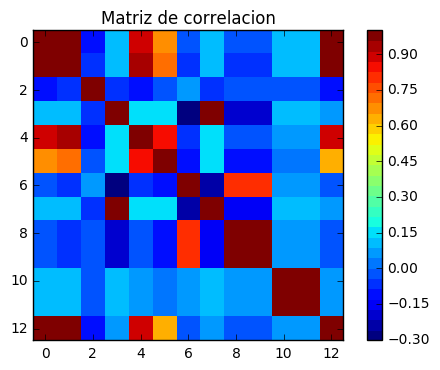

In [26]:
correlation_matrix(pd.DataFrame(np.column_stack((economia_imputada[:,:],gross_imputada[:,4]))))

## Iteramos el Splitter v3

In [27]:
R2_global = list()

for i in range(0,np.shape(gross_imputada)[1]):
    ## Zeros
    X_train, X_test, y_train, y_test = splitter_v3(np.array(economia_zeros),np.array(gross_zeros),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    ## Imputado
    X_train, X_test, y_train, y_test = splitter_v3(np.array(economia_imputada),np.array(gross_imputada),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    # Recopilamos los R2
    R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])

pd.DataFrame(R2_global,columns=['Original','Imputado'])

,Original,Imputado
0,0.315629,0.566606
1,0.672011,0.593349
2,0.506660,0.265225
3,0.980712,0.932445
4,0.998650,0.992953
5,0.961628,0.993491
6,0.807047,0.965051
7,0.996339,0.988010
8,0.905774,0.897211
9,0.330138,0.346292


In [28]:
def trial_2(tabla_1,tabla_2,y_indicator):
    tabla_1 = np.array(tabla_1)
    tabla_2 = np.array(tabla_2)
    X_train, X_test, y_train, y_test = splitter_v3(tabla_1,tabla_2,y_indicator)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    estimator = DecisionTreeRegressor(max_depth=best_max_depth)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print r2(y_test,y_predict)
    return pd.DataFrame(zip(*[y_test,y_predict]))

In [17]:
def iter_Splitter_v3(tab1,tab2,iteraciones):
    
    temporal = []
    iter_R2_Global_GridSearchCV = []
    
    for k in range(np.shape(tab2)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v3(np.array(tab1),np.array(tab2),k)
            best_max_depth = Grid_Search_CV(X_train, y_train)
            R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)  
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
        
    return iter_R2_Global_GridSearchCV

In [30]:
#pd.DataFrame(np.column_stack((iter_mean(iter_Splitter_v3(economia_zeros,gross_zeros,5)),iter_mean(iter_Splitter_v3(economia_imputada,gross_imputada,5)))),columns=['Original','Imputando'])

In [18]:
def iter_R2_Splitter_v3(tab1,tab2):
    start_time = time.time()    
    
    R2_global = list()
    for i in range(0,np.shape(tab2)[1]):
        ## Zeros
        X_train, X_test, y_train, y_test = splitter_v3(np.array(zeros(tab1)),np.array(zeros(tab2)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        ## Imputado
        X_train, X_test, y_train, y_test = splitter_v3(np.array(imputador(tab1)),np.array(imputador(tab2)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        # Recopilamos los R2
        R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])
    
    print("--- %s seconds ---" % (time.time() - start_time))   
    return pd.DataFrame(R2_global,columns=['Original','Imputado'])

In [32]:
def prueba_Splitter_v4(tab1,tab2):
    R2_global = list()

    for i in range(0,np.shape(tab2)[1]):
        ## Zeros
        X_train, X_test, y_train, y_test = splitter_v3(np.array(tab1),np.array(tab2),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        ## Imputado
        X_train, X_test, y_train, y_test = splitter_v3(np.array(imputador(tab1)),np.array(imputador(tab2)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        # Recopilamos los R2
        R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])

    return R2_global

In [33]:
gdp = economia_zeros
gross = gross_zeros
iteraciones = 3

In [34]:
start_time = time.time()
iterador = np.column_stack((iter_mean(gross,iter_Splitter_v3(gdp,gross,iteraciones)),iter_mean(gross,iter_Splitter_v3(imputador(gdp),imputador(gross),iteraciones))))
print("--- %s seconds ---" % (time.time() - start_time))
pd.DataFrame(iterador,columns=['Original','Imputando'])

--- 135.25999999 seconds ---


,Original,Imputando
0,0.317982,0.356239
1,0.683072,0.638890
2,0.156485,0.075244
3,0.787398,0.607373
4,0.975968,-0.028376
5,0.964995,0.979910
6,0.753079,0.608131
7,0.993437,0.994448
8,0.756367,0.752948
9,0.440510,0.960196


In [35]:
start_time = time.time()
iterador = iter_R2_Splitter_v3(gdp,gross)
print("--- %s seconds ---" % (time.time() - start_time))
iterador

--- 45.0679998398 seconds ---


,Original,Imputado
0,0.475176,0.891906
1,0.783437,0.779625
2,0.326878,0.318108
3,0.870582,0.995692
4,0.994870,0.327274
5,0.996755,0.983596
6,0.969599,0.749151
7,0.394430,0.998237
8,0.687238,0.710294
9,-0.320132,0.014822


In [27]:
def porcentaje(valor):
    x=0.0
    for i in np.array(valor):
        if (i[0] > 0.9 and i[1] > 0.9):
            x=x+1
    return x/len(valor)

In [37]:
start_time = time.time()
iterador=iter_R2_Splitter_v3(gdp,gross)
print("--- %s seconds ---" % (time.time() - start_time))
porcentaje(iterador)

--- 45.0460000038 seconds ---


0.2727272727272727

In [100]:
tabla_1 = np.array(t)
tabla_2 = np.array(t)

tab_fusion = np.column_stack((tabla_1[:,:],tabla_2[:,7]))
    
X = correlacion(tab_fusion,-1)
y = tab_fusion[:,-1]

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.347350e+09,1.239080e+09,108.320559,0.071111,14517.635341,15786.172840,-1.046262,25735.714754,24723.111892,2.196543e+09,2.110118e+09
1,1.206410e+09,1.089944e+09,110.260684,-12.036015,12629.713786,13979.262693,-13.004332,22388.956865,21671.375749,1.932167e+09,1.870240e+09
2,1.135539e+09,1.012090e+09,111.766847,-7.142991,11602.142227,13017.310387,-8.136143,20567.359344,20151.309866,1.794152e+09,1.757859e+09
3,1.129918e+09,9.939385e+08,113.244595,-1.793436,11275.280156,12817.841573,-2.817256,19987.924139,19987.924139,1.761975e+09,1.761975e+09
4,1.204713e+09,1.033890e+09,116.075112,4.019542,11607.745344,13525.616220,2.948620,20577.292107,20946.700835,1.832799e+09,1.865702e+09


In [101]:
pd.DataFrame(correlacion(np.array(zeros(t)),7)).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.347350e+09,1.239080e+09,108.320559,0.071111,14517.635341,15786.172840,-1.046262,25735.714754,24723.111892,2.196543e+09,2.110118e+09
1,1.206410e+09,1.089944e+09,110.260684,-12.036015,12629.713786,13979.262693,-13.004332,22388.956865,21671.375749,1.932167e+09,1.870240e+09
2,1.135539e+09,1.012090e+09,111.766847,-7.142991,11602.142227,13017.310387,-8.136143,20567.359344,20151.309866,1.794152e+09,1.757859e+09
3,1.129918e+09,9.939385e+08,113.244595,-1.793436,11275.280156,12817.841573,-2.817256,19987.924139,19987.924139,1.761975e+09,1.761975e+09
4,1.204713e+09,1.033890e+09,116.075112,4.019542,11607.745344,13525.616220,2.948620,20577.292107,20946.700835,1.832799e+09,1.865702e+09


In [44]:
pd.DataFrame(tabla_2[:,0]).head()

,0
0,3.358406e+09
1,2.954188e+09
2,2.743171e+09
3,2.693974e+09
4,2.802259e+09


In [88]:
X = correlacion(np.array(zeros(t)),0)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.347350e+09,1.239080e+09,108.320559,0.071111,14517.635341,42622.666667,15786.172840,-1.046262,25735.714754,24723.111892,2.196543e+09,2.110118e+09
1,1.206410e+09,1.089944e+09,110.260684,-12.036015,12629.713786,37744.009270,13979.262693,-13.004332,22388.956865,21671.375749,1.932167e+09,1.870240e+09
2,1.135539e+09,1.012090e+09,111.766847,-7.142991,11602.142227,35146.738046,13017.310387,-8.136143,20567.359344,20151.309866,1.794152e+09,1.757859e+09
3,1.129918e+09,9.939385e+08,113.244595,-1.793436,11275.280156,34608.172248,12817.841573,-2.817256,19987.924139,19987.924139,1.761975e+09,1.761975e+09
4,1.204713e+09,1.033890e+09,116.075112,4.019542,11607.745344,36519.163794,13525.616220,2.948620,20577.292107,20946.700835,1.832799e+09,1.865702e+09


In [52]:
iter_R2_Splitter_v2(economia)

,Original,Imputado
0,0.998437,0.997086
1,0.843618,0.983683
2,0.924986,0.933106
3,0.198148,0.026939
4,0.252957,0.089931
5,0.975271,0.991764
6,0.941392,0.962161
7,0.290956,0.176258
8,0.874367,0.502192
9,0.967400,0.915985


In [53]:
iter_R2_Splitter_v3(economia,economia)

,Original,Imputado
0,0.998356,0.998426
1,0.359197,0.981217
2,0.780662,0.733202
3,0.262351,0.307874
4,-0.091217,0.211586
5,0.994769,0.936814
6,0.513125,0.978221
7,0.120334,0.309089
8,0.936317,0.918701
9,0.908472,0.914565


In [20]:
def zeros(tab):
    #Asignamos a los NaN el valor de 0
    tab_zeros = pd.DataFrame(tab).fillna(value=0)
    #Eliminamos las columnas de Zeros descartando Indicadores que no tienen regristros para ningún pais y año deseados
    tab_zeros_2 = tab_zeros.loc[:, (tab_zeros != 0).any(axis=0)]
    return tab_zeros_2

In [21]:
def tabla_base(paises,years,indicadores,datos):
    start_time = time.time()  
    tab = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,years),indicadores]
    print("--- %s seconds ---" % (time.time() - start_time))
    return tab

In [22]:
paises = ['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)']
economia = ['NY.GDP.MKTP.KN','NY.GDP.MKTP.CN','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD','NY.GDP.DEFL.ZS','NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.KD','NY.GDP.PCAP.KN','NY.GDP.PCAP.CN','NY.GDP.PCAP.CD','NY.GDP.PCAP.KD.ZG','NY.GDP.PCAP.PP.KD','NY.GDP.PCAP.PP.CD','NY.GDP.MKTP.PP.KD','NY.GDP.MKTP.PP.CD']
years = range(2008,2012+1)

In [68]:
tabla_base(paises,years,economia,datos)

--- 1.55500006676 seconds ---


IndicatorCode                  NY.GDP.MKTP.KN  NY.GDP.MKTP.CN  NY.GDP.MKTP.CD  \
CountryName              Year                                                   
Antigua and Barbuda      2008    3.358406e+09    3.637845e+09    1.347350e+09   
                         2009    2.954188e+09    3.257308e+09    1.206410e+09   
                         2010    2.743171e+09    3.065955e+09    1.135539e+09   
                         2011    2.693974e+09    3.050780e+09    1.129918e+09   
                         2012    2.802259e+09    3.252725e+09    1.204713e+09   
Argentina                2008    7.058647e+11    1.283906e+12    4.037820e+11   
                         2009    7.062178e+11    1.411526e+12    3.766279e+11   
                         2010    7.729666e+11    1.810830e+12    4.616402e+11   
                         2011    8.377910e+11    2.312009e+12    5.578902e+11   
                         2012    8.445081e+11    2.765575e+12    6.043785e+11   
Aruba                    2008    3.293180e+09    4.997610e+09    2.791961e+09   
                         2009    3.107000e+09    4.473090e+09    2.498933e+09   
                         2010             NaN    4.417190e+09    2.467704e+09   
                         2011             NaN    4.626190e+09    2.584464e+09   
                         2012             NaN             NaN             NaN   
Bahamas, The             2008    7.893019e+09    8.246650e+09    8.246650e+09   
                         2009    7.563465e+09    7.820420e+09    7.820420e+09   
                         2010    7.679850e+09    7.909580e+09    7.909580e+09   
                         2011    7.726920e+09    7.889750e+09    7.889750e+09   
                         2012    7.898250e+09    8.234470e+09    8.234470e+09   
Barbados                 2008    1.141000e+09    9.190000e+09    4.595000e+09   
                         2009    1.095000e+09    9.204000e+09    4.602000e+09   
                         2010    1.098000e+09    8.891000e+09    4.445500e+09   
                         2011    1.106000e+09    8.716000e+09    4.358000e+09   
                         2012    1.109000e+09    8.626000e+09    4.313000e+09   
Belize                   2008    2.353310e+09    2.737250e+09    1.368625e+09   
                         2009    2.370095e+09    2.673914e+09    1.336957e+09   
                         2010    2.448874e+09    2.794227e+09    1.397113e+09   
                         2011    2.500397e+09    2.974011e+09    1.487006e+09   
                         2012    2.596031e+09    3.147735e+09    1.573867e+09   
...                                       ...             ...             ...   
Suriname                 2008    8.395000e+09    9.698000e+09    3.532969e+09   
                         2009    8.648000e+09    1.063800e+10    3.875410e+09   
                         2010    9.094000e+09    1.199300e+10    4.368398e+09   
                         2011    9.573000e+09    1.445200e+10    4.422277e+09   
                         2012    9.867000e+09    1.643400e+10    4.980000e+09   
Trinidad and Tobago      2008    9.292100e+10    1.752870e+11    2.787023e+10   
                         2009    8.884200e+10    1.212810e+11    1.917516e+10   
                         2010    8.875900e+10    1.341250e+11    2.103757e+10   
                         2011    8.876500e+10    1.564500e+11    2.440984e+10   
                         2012    8.997800e+10    1.580450e+11    2.458084e+10   
Turks and Caicos Islands 2008             NaN             NaN             NaN   
                         2009             NaN             NaN             NaN   
                         2010             NaN             NaN             NaN   
                         2011             NaN             NaN             NaN   
                         2012             NaN             NaN             NaN   
Uruguay                  2008    5.052072e+11    6.361509e+11    3.036621e+10   
                         2009  

In [ ]:
t = tabla_base(paises,years,economia,datos)
zeros(t)

In [ ]:
start_time = time.time()
iterador=iter_R2_Splitter_v3(t,t)
print("--- %s seconds ---" % (time.time() - start_time))
porcentaje(iterador)

In [23]:
def iterador_global(paises,years,indicadores_1,indicadores_2,datos):
    
    t_1 = tabla_base(paises,years,indicadores_1,datos)
    t_2 = tabla_base(paises,years,indicadores_2,datos)
    
    iterador = iter_R2_Splitter_v3(t_1,t_2)
    
    return iterador

In [36]:
def iterador_global_v2(paises,years,indicadores,datos):
    
    t_1 = tabla_base(paises,years,indicadores,datos)
    
    iterador = iter_R2_Splitter_v2(t_1)
    
    return iterador

In [24]:
paises = ['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)']
gdp = ['NY.GDP.MKTP.KN','NY.GDP.MKTP.CN','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD','NY.GDP.DEFL.ZS','NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.KD','NY.GDP.PCAP.KN','NY.GDP.PCAP.CN','NY.GDP.PCAP.CD','NY.GDP.PCAP.KD.ZG','NY.GDP.PCAP.PP.KD','NY.GDP.PCAP.PP.CD','NY.GDP.MKTP.PP.KD','NY.GDP.MKTP.PP.CD']
gross = ['NE.GDI.TOTL.ZS','NE.GDI.TOTL.KD.ZG','NE.GDI.TOTL.KD','NE.GDI.TOTL.KN','NE.GDI.TOTL.CN','NE.GDI.TOTL.CD','NY.GDY.TOTL.KN','NY.GDS.TOTL.ZS','NY.GDS.TOTL.CN','NY.GDS.TOTL.CD','NE.GDI.FTOT.ZS','NE.GDI.FTOT.KD.ZG','NE.GDI.FTOT.KD','NE.GDI.FTOT.KN','NE.GDI.FTOT.CN','NE.GDI.FTOT.CD','NE.GDI.FPRV.ZS','NE.GDI.FPRV.CN','NE.DAB.TOTL.ZS','NE.DAB.TOTL.KD','NE.DAB.TOTL.KN','NE.DAB.TOTL.CN','NE.DAB.TOTL.CD','NE.DAB.DEFL.ZS','NY.GNS.ICTR.ZS','NY.GNS.ICTR.GN.ZS','NY.GNS.ICTR.CN','NY.GNS.ICTR.CD','NY.GDP.FCST.KD','NY.GDP.FCST.KN','NY.GDP.FCST.CN','NY.GDP.FCST.CD']
years = range(2008,2012+1)

In [25]:
iterador_global(paises,years,gdp,gdp,datos)

--- 1.52499985695 seconds ---
--- 1.51800012589 seconds ---
--- 22.3259999752 seconds ---


,Original,Imputado
0,0.997017,0.987453
1,0.980250,-55.876891
2,0.970188,0.967767
3,0.932064,0.997815
4,0.970604,0.986093
5,0.291673,0.245403
6,0.441302,0.620196
7,0.993913,0.334421
8,0.958842,0.993888
9,0.781089,0.761078


In [30]:
porcentaje(iterador_global(paises,years,gdp,gross,datos))

--- 1.52600002289 seconds ---
--- 1.57299995422 seconds ---
--- 46.0540001392 seconds ---


0.40625

In [31]:
porcentaje(iterador_global(paises,years,gross,gdp,datos))

--- 1.58799982071 seconds ---
--- 1.56200003624 seconds ---
--- 24.1150000095 seconds ---


0.26666666666666666

In [33]:
porcentaje(iterador_global(paises,years,gdp,gdp,datos))

--- 1.54499983788 seconds ---
--- 1.56900000572 seconds ---
--- 26.8440001011 seconds ---


0.3333333333333333

In [40]:
porcentaje(iterador_global(paises,years,gross,gross,datos))

--- 1.65200018883 seconds ---
--- 1.55199980736 seconds ---
--- 52.4070000648 seconds ---


0.15625

In [37]:
porcentaje(iterador_global_v2(paises,years,gdp,datos))

--- 1.5569999218 seconds ---


0.3333333333333333

In [41]:
porcentaje(iterador_global_v2(paises,years,gross,datos))

--- 1.60400009155 seconds ---


0.125